# Is faster music happier?
### A project by Will Lawrence

### Overview: 

In this program, I will use a dataset of 2000+ songs from Spotify and I will analyze how positive (i.e. happy, cheerful, upbeat) a list of songs created with an inputted tempo are. That is, given a tempo (in beats per minute), this program will plot the valences (a measure from 0.0 to 1.0 describing the musical positiveness) in a scatter plot of a list of songs with tempos greater than or equal to the input. 

The key to this plot is a measure of happiness called valence, which is defined as follows:
##### Valence (float) - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). This measure is generated by Spotify algorithms. 

Another important definition is the tempo:
##### Tempo (float) - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

This topic interests me as I really enjoy upbeat and positive music. Recently, I've started to notice that faster songs generally make me more energized, but I was curious on how this faster pace is associated with happiness. I used what I learned about systematic program design to break down this problem into more concrete steps. This includes defining songs as data, plotting the necessary data, and removing songs that do not meet the criteria.

To ensure everything runs in the correct order, I will present my program code below followed by my Design Problem, Challenges, and Programmatic Design in the Future sections. At the bottom of the notebook, you can try out the function yourself!

## Program Code

2 of 2 tests passed


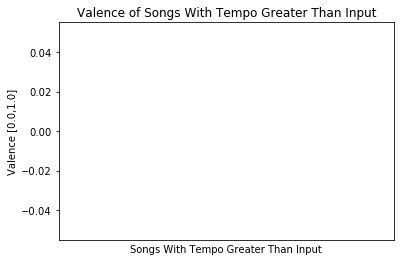

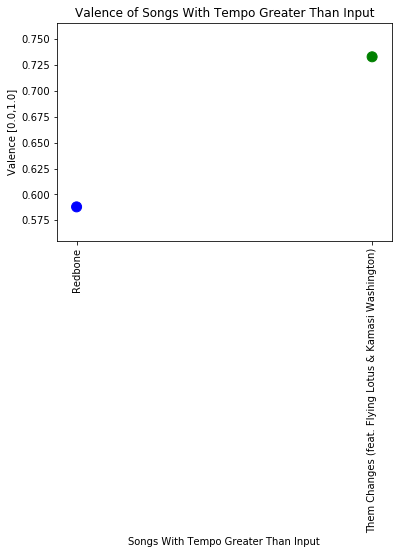

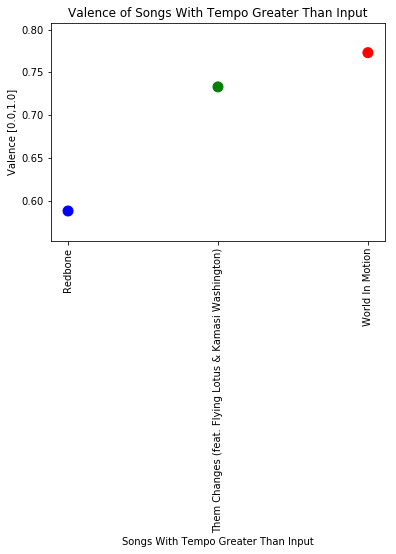

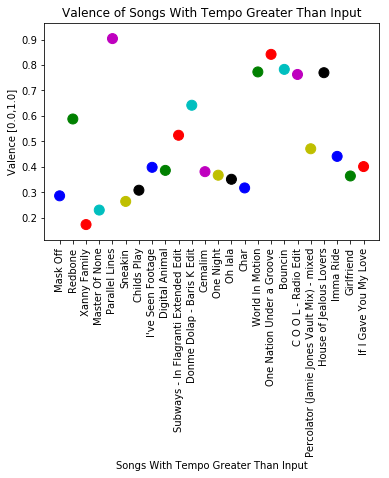

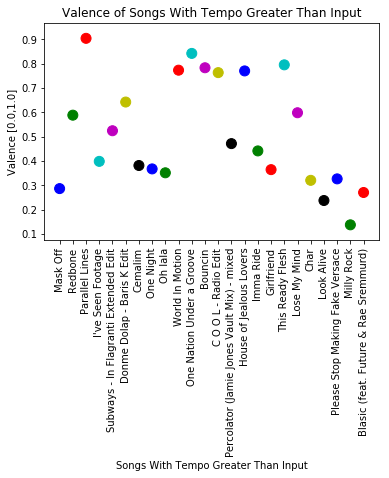

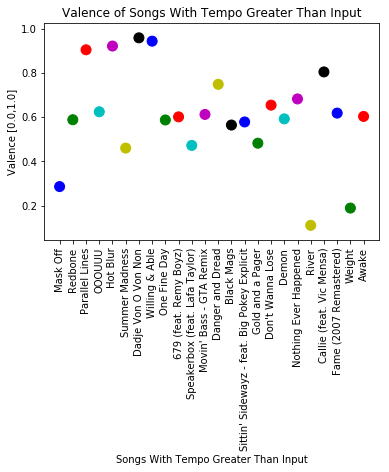

21 of 21 tests passed


In [1]:
# Setup
from cs103 import *
from typing import NamedTuple, List
import matplotlib.pyplot as pyplot
import csv

# Step 2a: Design data definitions

Song = NamedTuple('Song', [('title', str),             # song title
                           ('artist', str),            # artist who performs the song
                           ('acousticness', float),    # Confidence that song is acoustic [0.0,1.0] determined by Spotify
                           ('danceability', float),    # Confidence that song is danceable [0.0,1.0] determined by Spotify
                           ('tempo', float),           # Estimated tempo of a track in beats per minute (BPM) (0.0, )
                           ('valence', float)])        # Estimated musical positiveness conveyed by a track [0.0,1.0] determined by Spotify

# interp. A song with its associated title, artist, acoustincness (A confidence measure from 0.0 to 1.0 of whether the 
# track is acoustic), danceability (where 0.0 is least danceable and 1.0 is most danceable), tempo (in beats
# per minute), and valence (A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track)

S0 = Song('Redbone', 'Childish Gambino', 0.199, 0.743, 160.083, 0.588)
S1 = Song('Them Changes (feat. Flying Lotus & Kamasi Washington)', 'Thundercat', 0.555, 0.791, 81.678, 0.733)
S2 = Song('World In Motion', 'New Order', 0.0239, 0.603, 123.922, 0.773)
 
def fn_for_song(s: Song) -> ...:   # template based on compound
    return...(s.title,             # str
              s.artist,            # str
              s.acousticness,      # float [0.0,1.0]
              s.danceability,      # float [0.0,1.0]
              s.tempo,             # float (0.0...)
              s.valence)           # float [0.0,1.0]

# List[Song]
# interp. a list of Songs

LOS0 = []
LOS1 = [S0, S1]
LOS2 = [S0, S1, S2]

def fn_for_los(los: List[Song]) -> ...: # template from Arbitrary Sized Data and the reference rule
    # acc description
    acc = ...      # type: ...
    for s in los:
        ...(acc, fn_for_song(s))
        
    return acc

# List[str]
# interp. a list of strings

L0 = []
L1 = ["Jumpman", "Stronger", "Sweet Home Alabama"]

def fn_for_lost(lost: List[str]) -> ...: # template from Arbitrary Sized Data
    # acc description
    acc = ...      # type: ...
    for st in lost:
        ...(acc, st)

    return acc

# List[float]
# interp. a list of floats

LOF0 = []
LOF1 = [0.0,1.1,2.3,3.5,44.3,3.5,6.0]

def fn_for_lof(lof: List[float]) -> ...:  # template from Arbitrary Sized Data
    # acc description
    acc = ...      # type: ...
    for f in lof:
        ...(acc, f)

    return acc

# List[int]
# interp. a list of integers

LOI0 = []
LOI1 = [0,1,2,3]

def fn_for_loi(loi: List[int]) -> ...:  # template from Arbitrary Sized Data
    # acc description
    acc = ...      # type: ...
    for i in loi:
        ...(acc, i)

    return acc

def read(filename: str) -> List[Song]:
    """    
    reads information from the specified csv file and returns a list of songs with associated title, 
    artist, acoustincness [0.0,1.0], danceability [0.0,1.0], tempo ((0.0...) in beats per minute), and valence [0.0,1.0]
    """
    # return []
    # template from HtDAP
    # acc contains the result so far
    acc = [] # type: List[Song]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile, delimiter=',')
        next(reader) # skip header line

        for row in reader:
            s = Song(row[0], row[1], parse_float(row[2]), parse_float(row[3]), parse_float(row[12]), parse_float(row[14]))
            acc.append(s)
        
        return acc

# Begin testing
start_testing()

# Examples for read

expect(read('spotifydata_test1.csv'), [('Mask Off', 'Future', 0.0102, 0.833, 150.062, 0.286), 
                                       ('Redbone', 'Childish Gambino', 0.199, 0.743, 160.083, 0.588)])
expect(read('spotifydata_test2.csv'), [('World In Motion', 'New Order', 0.0239, 0.603, 123.922, 0.773),
                                       ('One Nation Under a Groove', 'Funkadelic', 0.233, 0.789, 122.415, 0.842),
                                       ('Bouncin', 'Chief Keef', 0.314, 0.713, 140.061, 0.783)])
# show testing summary
summary()

def check_tempo(s: Song, t: float) -> bool:
    '''
    Return True if the inputted song's tempo (s.tempo) is greater than or equal to the inputted float (0.0...)in beats
    per minute (BPM)
    '''
    # return True        # Body of Stub
    # return...(s, t)    # Template based on function composition for float
    if s.tempo >= t:
        return True
    else:
        return False

def create_song_list(los: List[Song], t: float) -> List[Song]:
    '''
    Given a list of songs, return a list of songs that have a tempo (s.tempo) greater than or equal to the 
    inputted floats for tempo (t)
    '''
    # return []  # body of stub
    # template from List[Song] with one other float input
    # acc stores songs that meet the criteria so far
    acc = []      # type: List[Song]
    for s in los:
        if check_tempo(s, t)== True:
            acc.append(s)
        else:
            acc
    return acc

def list_valence(los: List[Song]) -> List[float]:
    '''
    Given a list of Songs, extract a list of the songs valences
    ''' 
    # return []  # Body of Stub
    # template from List[Song]
    # valences stores songs' valences so far
    valences = []      # type: List[float]
    for s in los:
            valences.append(s.valence)
    return valences
    
def list_title(los: List[Song]) -> List[str]:
    '''
    Given a list of Songs, extract a list of the songs titles
    ''' 
    # return []  # Body of Stub
    # template from List[Song]
    # titles stores song names so far
    titles = []      # type: List[str]
    for s in los:
        titles.append(s.title)
    return titles

def shorten_list_25(los: List[Song]) -> List[Song]:
    '''
    Given a list of songs, take the first 25 Songs into a new list
    '''
    # return []    # Body of the stub
    # template based on a call to a primitive list operator
    return los[:24]

def ascending_int_list(los: List[Song]) -> List[int]:
    '''
    Given a list of songs, create a list of n ascending integers (ex. [0,1,2,3,4,5,6]) where n is the number of songs
    in the inputted list
    '''
    # return []    # Body of the stub
    # template based on a call to a primitive list operator
    return list(range(len(los)))

def plot_valence_song(los: List[Song]) -> None:
    """
    Display a scatter plot of 25 songs with their corresponding titles (x axis) and valences (y axis)
    """
    # return None # body of the stub
    
    # set the x-axis label, y-axis label, and plot title
    pyplot.xlabel('Songs With Tempo Greater Than Input')
    pyplot.ylabel('Valence [0.0,1.0]')
    pyplot.title('Valence of Songs With Tempo Greater Than Input')
    
    # If list is longer than 25 songs, shorter list of songs to 25
    songs = shorten_list_25(los)
    
    # plot our data 
    
    scatter = pyplot.scatter(ascending_int_list(songs), list_valence(songs), marker="o", s=100, color=('b', 'g', 'r', 'c', 'm', 'y', 'k'))
    
    # Set titles as labels on the x axis
    pyplot.xticks(ascending_int_list(songs), list_title(songs), rotation='vertical')
    
    # show the plot
    pyplot.show()
    
    return None

def main(filename: str, tempo: float) -> None:
    '''
    Given a filename and a tempo (0.0...), return a plot of the valences of 25 songs that have a tempo greater than
    the inputted float
    '''
    # template based on function composition
    return plot_valence_song(create_song_list(read(filename), tempo))

#Begin Testing
start_testing()

# Examples for check_tempo
expect(check_tempo(S0, 300), False)
expect(check_tempo(S1, 100), False)
expect(check_tempo(S0, 100), True)

# Examples for create_song_list
expect(create_song_list(LOS0, 100), [])
expect(create_song_list(LOS1, 100), [S0])
expect(create_song_list(LOS2, 100), [S0, S2])

# Examples for list_valence
expect(list_valence(LOS0), [])
expect(list_valence(LOS1), [0.588, 0.733])
expect(list_valence(LOS2), [0.588, 0.733, 0.773])

# Examples for list_title
expect(list_title(LOS0), [])
expect(list_title(LOS1), ["Redbone", "Them Changes (feat. Flying Lotus & Kamasi Washington)"])
expect(list_title(LOS2), ["Redbone", "Them Changes (feat. Flying Lotus & Kamasi Washington)", "World In Motion"])

# Examples for shorten_list 25
expect(shorten_list_25(LOS0), [])
expect(shorten_list_25(LOS1), [S0, S1])
expect(shorten_list_25(LOS2), [S0, S1, S2])

# Examples for ascending_int_list
expect(ascending_int_list(LOS0), [])
expect(ascending_int_list(LOS1), [0,1])
expect(ascending_int_list(LOS2), [0,1,2])

# Examples for plot_valence_song
expect(plot_valence_song(LOS0), None)
expect(plot_valence_song(LOS1), None)
expect(plot_valence_song(LOS2), None)

# Examples for main
main('spotifydata.csv', 10)
main('spotifydata.csv', 100)
main('spotifydata.csv', 150)

summary()

# Code for bad example
# NOT PART OF COMPLETE PROGRAM
# Tests ommitted
def plot_bad_plot(los: List[Song]) -> None:
    """
    Display a scatter plot of 25 songs with their corresponding titles (x axis) and valences (y axis)
    """
    # return None # body of the stub
    # template from Visualization Module
    
    # set the x-axis label, y-axis label, and plot title
    pyplot.xlabel('Songs With Tempo Greater Than Input')
    pyplot.ylabel('Valence [0.0,1.0]')
    pyplot.title('Valence of Songs With Tempo Greater Than Input')
    
    # If list is longer than 25 songs, shorter list of songs to 25
    songs = shorten_list_25(los)
    
    # plot our data 
    
    scatter = pyplot.scatter(ascending_int_list(songs), list_valence(songs), marker="o", s=100, color=('b', 'g', 'r', 'c', 'm', 'y', 'k'))
    
    # show the plot
    pyplot.show()
    
    return None

### Design Problem: 

In this program, I needed to use everything we learned in this class to systimatically break down my data set and apprpriately display it. I needed to decide the best way to present the information, notably answering the question "How would I organize my x axis?". For this example, I ultimately made the decision to use a categorical variable in a scatter plot, which is something I had to learn by reading the documentation of matplotlib.

To better illustrate the problem above, this could have been my plot:

#### Below is an example of a bad plot with no x-labels

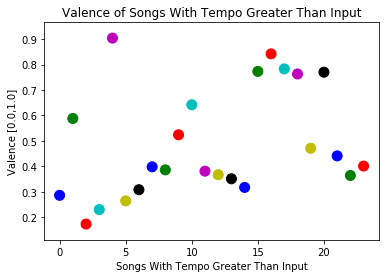

In [2]:
plot_bad_plot(read('spotifydata.csv'))

#### Below is the better plot that I created with song labels on the x-axis

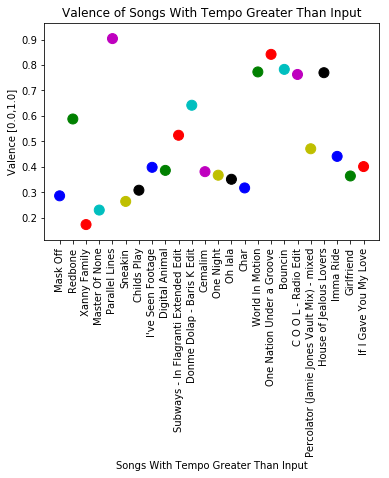

In [3]:
plot_valence_song(read('spotifydata.csv'))

### Challenge

The most difficult part of the project was figuring out a way to create an ascending list of integers for my x axis. This as not included in the data set and we hadn't covered a solution in class. I decided to go online and read forums, documentation, and tutorials to figure out a solution. Ultimately I used two functions that I learned online, range and list. This led me to a function that does this:

#### list(range(len(los)))

In [4]:
# This fucntion in action takes a lsit of songs and creatse a list of n ascending integers (ex. [0,1,2,3,4,5,6]) where 
# n is the number of songs in the inputted list. Here is an example:

ascending_int_list(LOS2)

[0, 1, 2]

### Systematic Program Design in the Future:
As someone who is interested in working in technology, I can easily see myself usign systematic program design to build analysis programs, automated scripts, or scraping tools. This course was also helpful in teaching me key terms for working with developers in the future. This will be really helpful in working with engineers!

Two example of how I could use systematic program design in my field:
1. Understand what engineers on my project team are referring to when mentioning things like loops, libraries, or functions
2. Design a simple visualization of revenue forecasts

# Try the Program out Yourself!
### Input a tempo and see how valence (a happiness measure) changes!

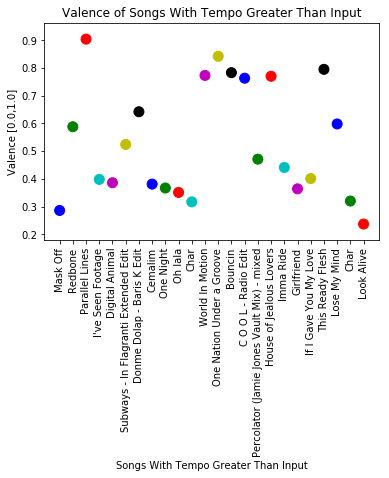

In [5]:
# tempos usually range from 50-200 beats per minute

tempo = 90 

# Run the code!
main('spotifydata.csv', tempo)